# Projet_ML
## 2022-2023
---

**Importation des bibliothèques**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt


**Assemblage Google Drive dans Colaboratory**

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


**Lecture des fichiers *train_Insurance.csv* & *test_Insurance.csv***


In [ ]:
test_path="/content/drive/MyDrive/test_Insurance.csv"
train_path="/content/drive/MyDrive/train_Insurance.csv"
test_data=pd.read_csv(test_path)
train_data=pd.read_csv(train_path)

---

### **Analyse de données & Data preprocessing** 

In [ ]:
train_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [ ]:
train_data.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [ ]:
train_data['Building Dimension'].mean()

1876.8986828774064

In [ ]:
train_data['Building Dimension'].mode()

0    400.0
Name: Building Dimension, dtype: float64

In [ ]:
train_data['Building Dimension'].median()

1067.0

In [ ]:
train_data[train_data['NumberOfWindows']=="without"]["Building Dimension"].mode()

0    600.0
Name: Building Dimension, dtype: float64

In [ ]:
train_data[train_data['NumberOfWindows']=="without"]["Building Dimension"].mean()

1546.0954564401834

In [ ]:
x1=train_data[train_data['Settlement']=="R"]["Building Dimension"].mean()
x1

2189.8312302839117

In [ ]:
x2=train_data[train_data['Settlement']=="U"]["Building Dimension"].mean()
x2

1546.0954564401834

In [ ]:
train_data['Building Dimension'] = train_data['Building Dimension'].where(train_data['Settlement']== 'U', train_data['Building Dimension'].fillna(x2))
train_data['Building Dimension'] = train_data['Building Dimension'].where(train_data['Settlement']== 'R', train_data['Building Dimension'].fillna(x1))

In [ ]:
train_data["Building Dimension"].isnull().sum()

0

In [ ]:
train_data[(train_data['Settlement'] == "U") & (train_data['Garden'] == "V")]["Geo_Code"].mode()

0    6088
Name: Geo_Code, dtype: object

In [ ]:
train_data['Geo_Code'].fillna(train_data['Geo_Code'].mode()[0],inplace=True)

In [ ]:
train_data['Geo_Code'].isnull().sum()

0

In [ ]:
train_data['Garden'].fillna(train_data['Garden'].mode()[0],inplace=True)

In [ ]:
train_data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [ ]:
x1=test_data[test_data['Settlement']==0]["Building Dimension"].mean()
x2=test_data[test_data['Settlement']==1]["Building Dimension"].mean()
test_data['Building Dimension'] = test_data['Building Dimension'].where(test_data['Settlement']== 1, test_data['Building Dimension'].fillna(x2))
test_data['Building Dimension'] = test_data['Building Dimension'].where(test_data['Settlement']== 0, test_data['Building Dimension'].fillna(x1))

In [ ]:
data=pd.concat([train_data,test_data]).sort_values(by=['Customer Id'])


<Axes: title={'center': 'distribution de reclamation'}, xlabel='Claim', ylabel='count'>

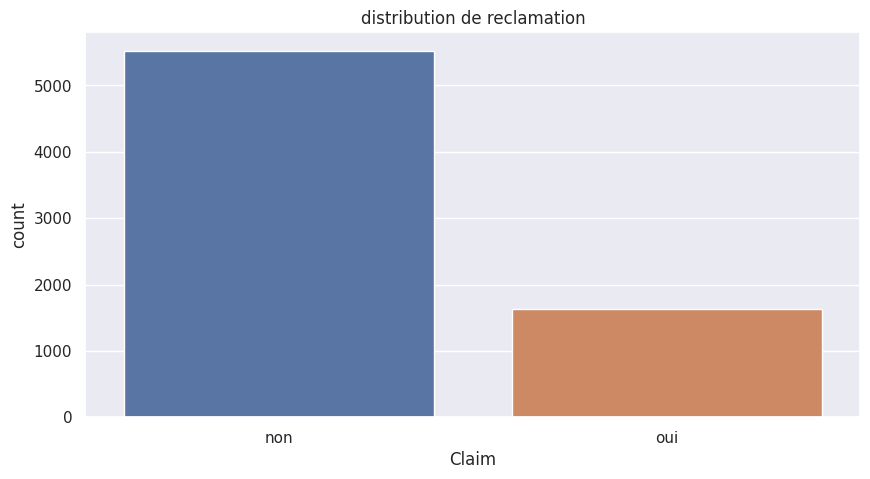

In [ ]:

fig = plt.figure(figsize=(10, 5))
plt.title('distribution de reclamation')
sns.countplot(x='Claim', data=data)


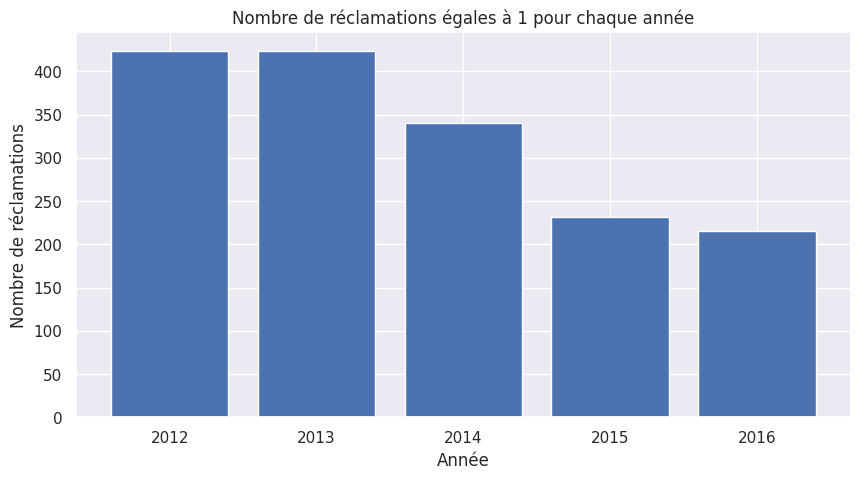

In [ ]:

# Créer un sous-dataframe ne contenant que les observations où Claim == 1
claims_df = data[data['Claim'] == "oui"]

# Compter le nombre de réclamations pour chaque année
counts = claims_df['YearOfObservation'].value_counts()

# Afficher un histogramme du nombre de réclamations pour chaque année
fig = plt.figure(figsize=(10, 5))
plt.bar(counts.index, counts.values)
plt.xlabel('Année')
plt.ylabel('Nombre de réclamations')
plt.title('Nombre de réclamations égales à 1 pour chaque année')
plt.show()


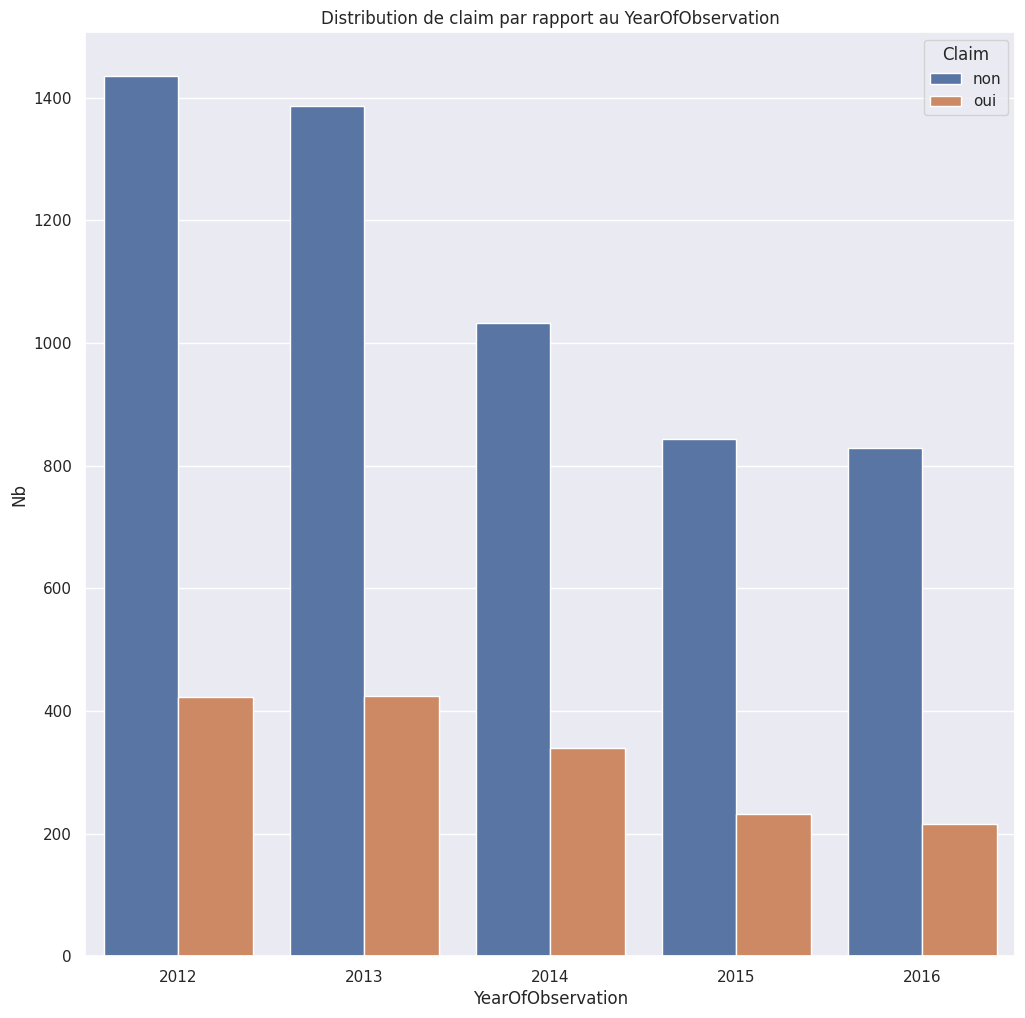

In [ ]:
sns.countplot(x='YearOfObservation', hue='Claim', data=data)
plt.title('Distribution de claim par rapport au YearOfObservation')
plt.xlabel('YearOfObservation')
plt.ylabel('Nb')
plt.show()

<Axes: title={'center': 'nb building pour chaque periode assuré '}, xlabel='Insured_Period', ylabel='count'>

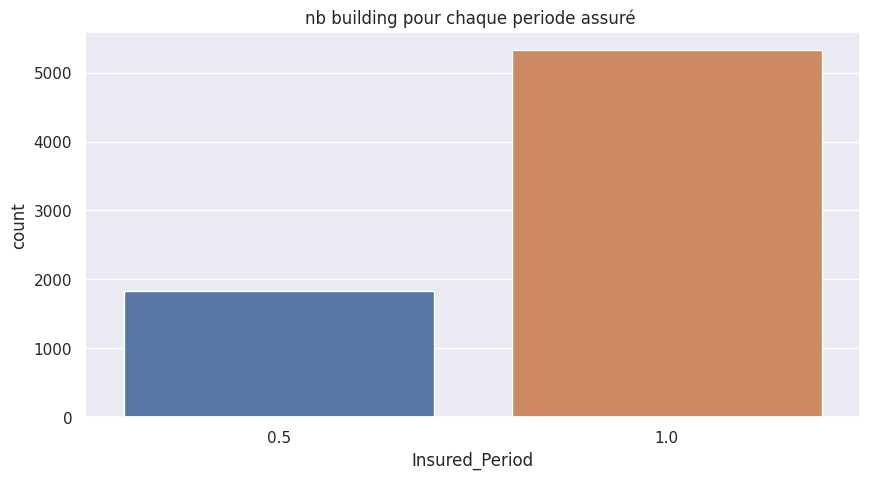

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.title('nb building pour chaque periode assuré ')
sns.countplot(x='Insured_Period', data=data)

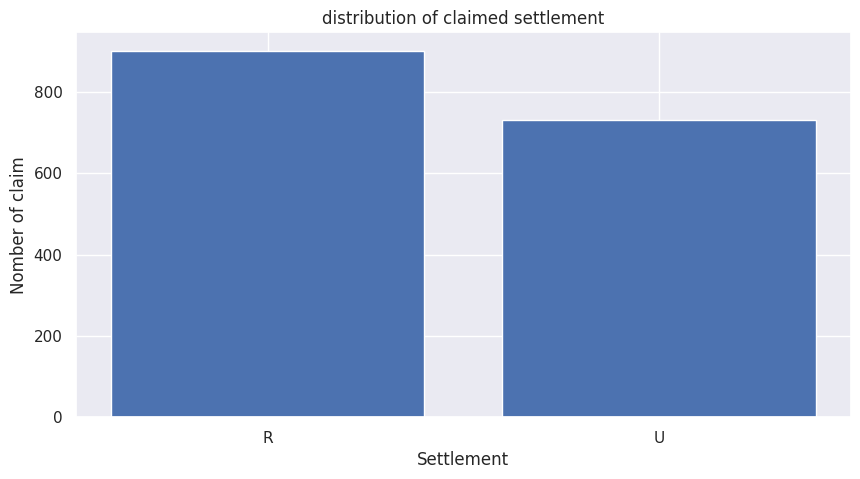

In [ ]:


# Créer un sous-ensemble contenant seulement les demandes de claim= oui
claims = data[data['Claim']=='oui']

# Compter le nombre de demandes de sinistre pour chaque type d'appartement
claim_counts = claims['Settlement'].value_counts()

fig = plt.figure(figsize=(10, 5))
# Créer un graphe en barres
plt.bar(claim_counts.index, claim_counts.values)

# Ajouter des labels pour l'axe x et l'axe y, et un titre
plt.xlabel('Settlement')
plt.ylabel('Nomber of claim')
plt.title('distribution of claimed settlement')

# Afficher le graphe
plt.show()


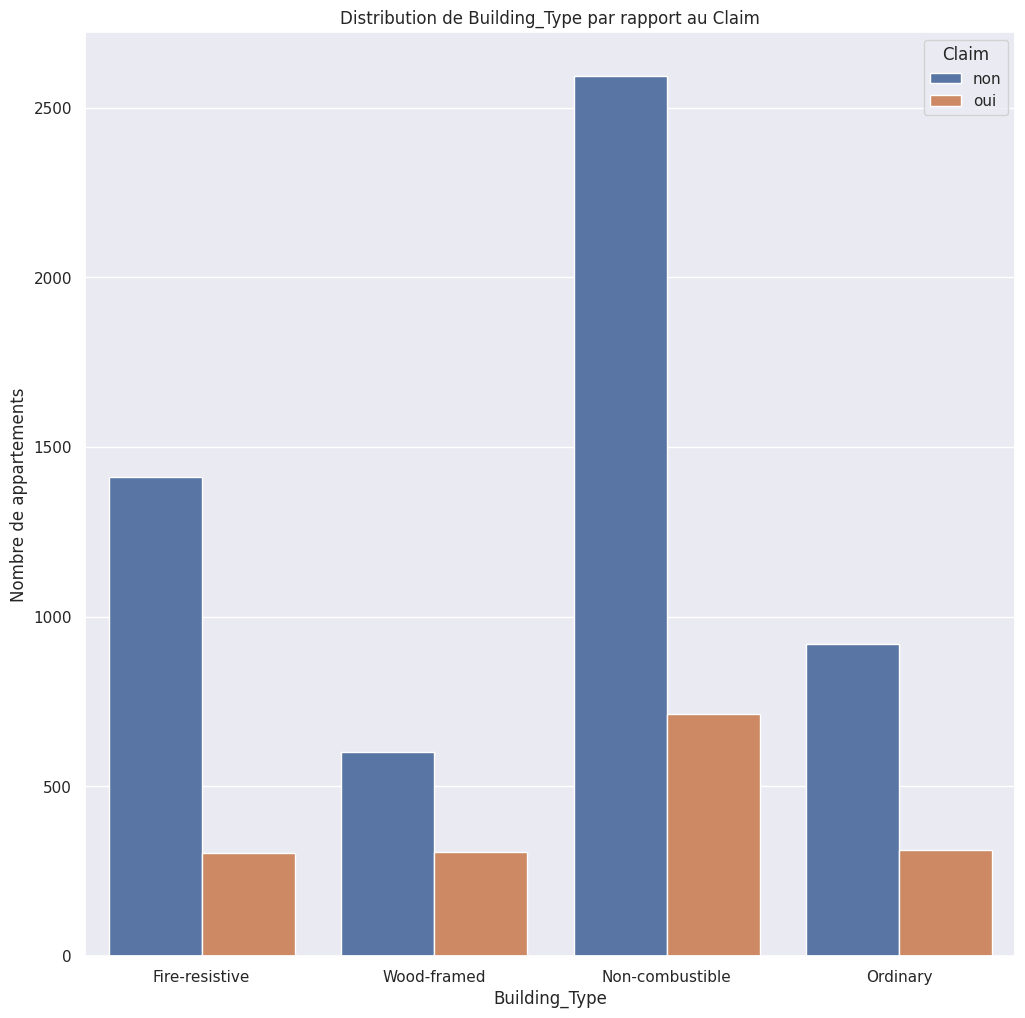

In [ ]:


sns.countplot(x='Building_Type', hue='Claim', data=data)
plt.title('Distribution de Building_Type par rapport au Claim')
plt.xlabel('Building_Type')
plt.ylabel('Nombre de appartements')
plt.show()



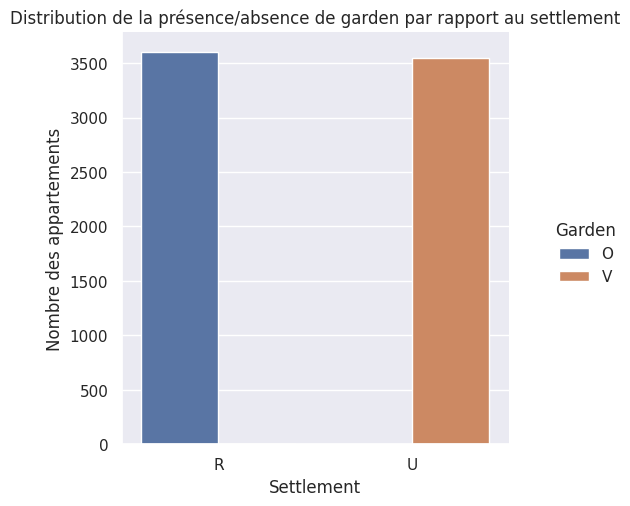

In [ ]:


# Création d'un sous-ensemble des données pour les variables Settlement et Garden
subset = data[['Settlement', 'Garden']].dropna()

# Comptage du nombre de jardins présents et absents par Settlement
count_df = subset.groupby(['Settlement', 'Garden']).size().reset_index(name='count')

# Création du graphe
sns.catplot(x='Settlement', y='count', hue='Garden', kind='bar', data=count_df)

# Affichage du graphe
plt.title('Distribution de la présence/absence de garden par rapport au settlement')
plt.xlabel('Settlement')
plt.ylabel('Nombre des appartements')
plt.show()


In [ ]:
train_data.drop(['Customer Id'],inplace=True,axis=1)

In [ ]:
train_data

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,N,V,V,U,1240.00000,Wood-framed,without,75117,non
1,2012,1.0,0,N,V,V,U,900.00000,Non-combustible,without,62916,non
2,2013,1.0,1,V,N,O,R,4984.00000,Non-combustible,4,31149,oui
3,2016,0.5,0,N,V,V,U,600.00000,Wood-framed,without,6012,oui
4,2012,1.0,0,N,V,V,U,900.00000,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,N,V,V,U,550.00000,Ordinary,without,33063,oui
5008,2012,0.5,0,V,N,O,R,1000.00000,Fire-resistive,4,13004,non
5009,2015,1.0,1,V,N,O,R,480.00000,Ordinary,3,94059,non
5010,2012,0.5,0,V,N,O,R,536.00000,Fire-resistive,4,74243,non


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency



# Définir une fonction pour calculer Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Calculer la matrice de corrélation Cramer's V
corr_matrix = pd.DataFrame(index=train_data.columns, columns=train_data.columns)
for i in range(len(train_data.columns)):
    for j in range(len(train_data.columns)):
        corr_matrix.iloc[i,j] = cramers_v(train_data.iloc[:,i], train_data.iloc[:,j])




<Axes: >

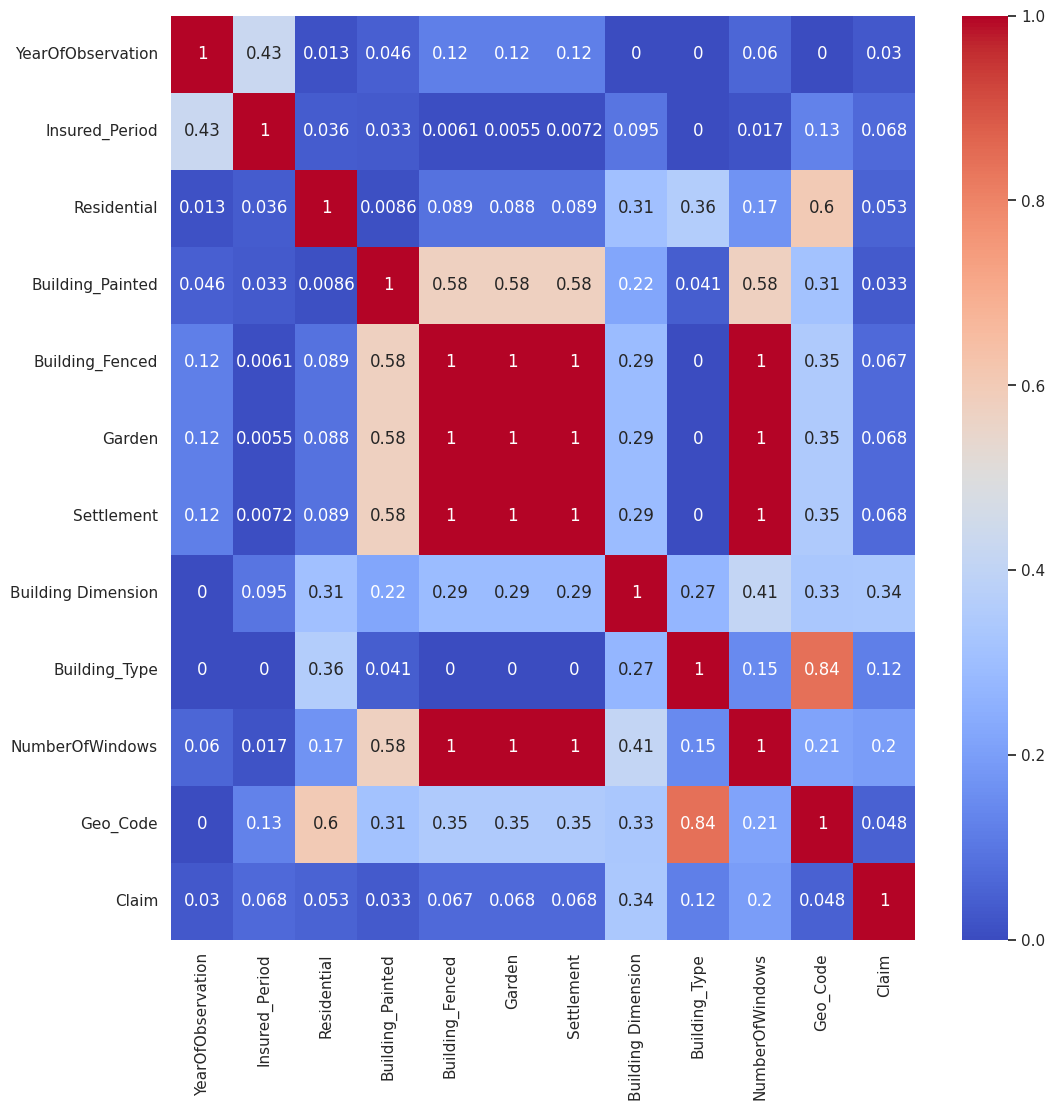

In [ ]:
import seaborn as sns
import numpy as np
data = corr_matrix.astype(float)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(data,annot=True, cmap='coolwarm')

In [ ]:
test_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,H19924,2016,0.5,1,V,N,O,R,862.0,Wood-framed,2,6159,non
2143,H17249,2012,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
2144,H18804,2014,1.0,0,V,N,O,R,730.0,Non-combustible,3,69027,non
2145,H12650,2014,1.0,1,N,V,V,U,568.0,Non-combustible,without,69091,oui


In [ ]:
#Label encoder function
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data['Building_Painted']=encoder.fit_transform(train_data['Building_Painted'])
train_data['Building_Fenced']=encoder.fit_transform(train_data['Building_Fenced'])
train_data['Garden']=encoder.fit_transform(train_data['Garden'])
train_data['Settlement']=encoder.fit_transform(train_data['Settlement'])
train_data['Claim']=encoder.fit_transform(train_data['Claim'])
train_data

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,0,1,1,1,1240.00000,Wood-framed,without,75117,0
1,2012,1.0,0,0,1,1,1,900.00000,Non-combustible,without,62916,0
2,2013,1.0,1,1,0,0,0,4984.00000,Non-combustible,4,31149,1
3,2016,0.5,0,0,1,1,1,600.00000,Wood-framed,without,6012,1
4,2012,1.0,0,0,1,1,1,900.00000,Non-combustible,without,57631,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,0,1,1,1,550.00000,Ordinary,without,33063,1
5008,2012,0.5,0,1,0,0,0,1000.00000,Fire-resistive,4,13004,0
5009,2015,1.0,1,1,0,0,0,480.00000,Ordinary,3,94059,0
5010,2012,0.5,0,1,0,0,0,536.00000,Fire-resistive,4,74243,0


In [ ]:
train_data["Building_Type"].value_counts()

Non-combustible    2310
Fire-resistive     1205
Ordinary            854
Wood-framed         643
Name: Building_Type, dtype: int64

In [ ]:
	type_to_num= {
    "Building_Type": {"Non-combustible":0,"Fire-resistive":1,"Ordinary":2,"Wood-framed":3}}

train_data=train_data.replace(type_to_num)
train_data

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,0,1,1,1,1240.00000,3,without,75117,0
1,2012,1.0,0,0,1,1,1,900.00000,0,without,62916,0
2,2013,1.0,1,1,0,0,0,4984.00000,0,4,31149,1
3,2016,0.5,0,0,1,1,1,600.00000,3,without,6012,1
4,2012,1.0,0,0,1,1,1,900.00000,0,without,57631,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,0,1,1,1,550.00000,2,without,33063,1
5008,2012,0.5,0,1,0,0,0,1000.00000,1,4,13004,0
5009,2015,1.0,1,1,0,0,0,480.00000,2,3,94059,0
5010,2012,0.5,0,1,0,0,0,536.00000,1,4,74243,0


In [ ]:
train_data['NumberOfWindows'].value_counts()

without    2476
4           667
3           600
5           436
2           245
6           225
7           142
8            84
>=10         53
1            49
9            35
Name: NumberOfWindows, dtype: int64

In [ ]:
nbwin_to_num= {
    "NumberOfWindows": {"without":0,">=10":10}}

train_data=train_data.replace(nbwin_to_num)
train_data

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,1,0,1,1,1,1240.00000,3,0,75117,0
1,2012,1.0,0,0,1,1,1,900.00000,0,0,62916,0
2,2013,1.0,1,1,0,0,0,4984.00000,0,4,31149,1
3,2016,0.5,0,0,1,1,1,600.00000,3,0,6012,1
4,2012,1.0,0,0,1,1,1,900.00000,0,0,57631,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,0,1,1,1,550.00000,2,0,33063,1
5008,2012,0.5,0,1,0,0,0,1000.00000,1,4,13004,0
5009,2015,1.0,1,1,0,0,0,480.00000,2,3,94059,0
5010,2012,0.5,0,1,0,0,0,536.00000,1,4,74243,0


In [ ]:
train_data['NumberOfWindows'].value_counts()

0     2476
4      667
3      600
5      436
2      245
6      225
7      142
8       84
10      53
1       49
9       35
Name: NumberOfWindows, dtype: int64

In [ ]:
train_data.corr()

<ipython-input-32-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Claim
YearOfObservation,1.000000,-0.301636,-0.025558,0.048231,-0.123026,-0.122836,-0.122646,0.004434,0.012040,-0.020188
Insured_Period,-0.301636,1.000000,-0.039430,-0.036210,0.015859,0.015622,0.016294,-0.010508,0.004550,0.070145
Residential,-0.025558,-0.039430,1.000000,-0.017048,-0.090274,-0.090012,-0.090621,0.066344,0.318580,0.055220
Building_Painted,0.048231,-0.036210,-0.017048,1.000000,-0.578215,-0.578447,-0.578680,0.097475,-0.023021,0.036031
Building_Fenced,-0.123026,0.015859,-0.090274,-0.578215,1.000000,0.999601,0.999202,-0.138725,-0.017535,-0.069308
Garden,-0.122836,0.015622,-0.090012,-0.578447,0.999601,1.000000,0.999601,-0.138658,-0.017175,-0.070050
Settlement,-0.122646,0.016294,-0.090621,-0.578680,0.999202,0.999601,1.000000,-0.138599,-0.016814,-0.069836
Building Dimension,0.004434,-0.010508,0.066344,0.097475,-0.138725,-0.138658,-0.138599,1.000000,0.010971,0.286072
Building_Type,0.012040,0.004550,0.318580,-0.023021,-0.017535,-0.017175,-0.016814,0.010971,1.000000,0.094423
Claim,-0.020188,0.070145,0.055220,0.036031,-0.069308,-0.070050,-0.069836,0.286072,0.094423,1.000000


In [ ]:
test_data['Building_Painted']=encoder.fit_transform(test_data['Building_Painted'])
test_data['Building_Fenced']=encoder.fit_transform(test_data['Building_Fenced'])
test_data['Garden']=encoder.fit_transform(test_data['Garden'])
test_data['Settlement']=encoder.fit_transform(test_data['Settlement'])
test_data['Claim']=encoder.fit_transform(test_data['Claim'])
test_data=test_data.replace(nbwin_to_num)
test_data=test_data.replace(type_to_num)
test_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,1,1,1,1,3760.0,1,0,43157,1
1,H16909,2015,1.0,0,1,0,0,0,1452.0,1,5,58194,0
2,H16867,2013,1.0,1,1,0,0,0,1944.0,2,6,92050,1
3,H14813,2015,1.0,0,0,1,1,1,2270.0,0,0,13209,1
4,H3728,2016,0.5,0,1,0,0,0,2976.0,1,9,5177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,H19924,2016,0.5,1,1,0,0,0,862.0,3,2,6159,0
2143,H17249,2012,1.0,0,1,1,1,1,NaN,0,0,NaN,0
2144,H18804,2014,1.0,0,1,0,0,0,730.0,0,3,69027,0
2145,H12650,2014,1.0,1,0,1,1,1,568.0,0,0,69091,1


In [ ]:
x1=test_data[test_data['Settlement']==0]["Building Dimension"].mean()
x2=test_data[test_data['Settlement']==1]["Building Dimension"].mean()
test_data['Building Dimension'] = test_data['Building Dimension'].where(test_data['Settlement']== 1, test_data['Building Dimension'].fillna(x2))
test_data['Building Dimension'] = test_data['Building Dimension'].where(test_data['Settlement']== 0, test_data['Building Dimension'].fillna(x1))


In [ ]:
test_data.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64

### **Apprentissage automatique : construction des modèles** 

In [ ]:
X_train=train_data.drop(['Building_Fenced','Claim','Garden','NumberOfWindows',"Geo_Code"], axis=1)
y_train=train_data["Claim"]
X_test=test_data.drop(['Building_Fenced','Claim','Garden','NumberOfWindows',"Geo_Code","Customer Id"], axis=1)
y_test=test_data["Claim"]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=700, random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=700, random_state=42)

In [ ]:
y_pred1 = clf.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Créer un objet de classe DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Adapter le modèle aux données d'apprentissage
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6828132277596647

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
model_params = {
     'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf']
        }  
    },
 
  
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.783519,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.731245,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.786112,{'logisticregression__C': 5}


In [ ]:
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[ ('knn', knn)])
param_grid = {
    'knn__n_neighbors': [2,5,15, 30, 45, 64]
}

grid = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train,y_train)
grid.best_estimator_
print(grid.best_score_)

0.7809265930290813


---

### **Validation & Interprétation** 

In [ ]:
accuracy_score(y_test, y_pred1)

0.7755006986492781

In [ ]:
f1 = f1_score(y_test, y_pred1)
f1

0.18581081081081083

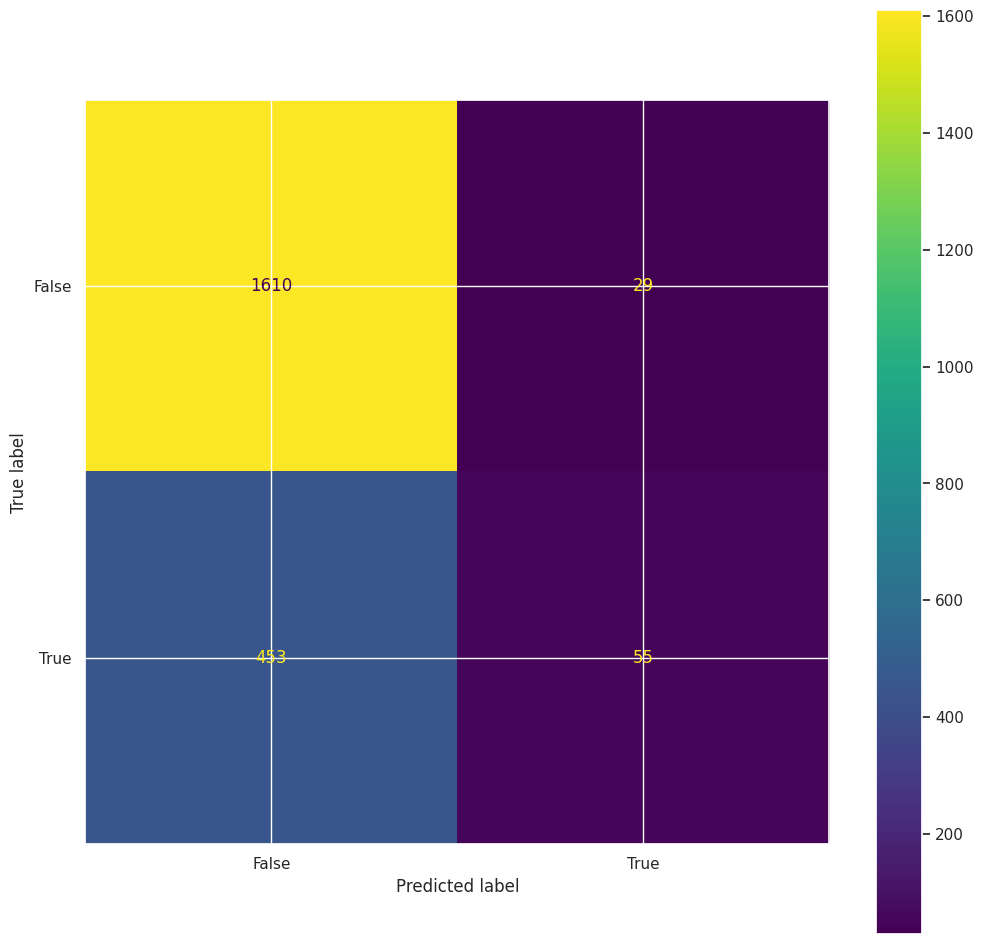

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics 
confusion_matrix=metrics.confusion_matrix(y_test,y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True]) 
cm_display.plot()
plt.show()

---